In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import json
import lxml
import time
import pandas as pd
import requests
import html

In [ ]:
results=[]
headers = {
        'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'tr-TR,tr;q=0.9,en-US;q=0.8,en;q=0.7',
        'Cache-Control': 'max-age=0',
        'Cookie':'zguid=24|%24028f0195-e231-4be2-829e-d8bcb4ac3239; zgsession=1|6c934aa2-6a0b-4752-a54c-50b4e9e983fa; x-amz-continuous-deployment-state=AYABeJbvQVGrX1047P18u%2FuoEqoAPgACAAFEAB1kM2Jsa2Q0azB3azlvai5jbG91ZGZyb250Lm5ldAABRwAVRzA3MjU1NjcyMVRZRFY4RDcyVlpWAAEAAkNEABpDb29raWUAAACAAAAADGXWg1Z6055f3nNqSgAw7XhrOZDwkiZIsaGxfZznrzw9zAPh5T5rzoN3IGNi5unaBgT2CqRPOjjz2oQ2qjhqAgAAAAAMAAQAAAAAAAAAAAAAAAAAAPtS6WIOJxz3BfK+nIL6M8f%2F%2F%2F%2F%2FAAAAAQAAAAAAAAAAAAAAAQAAAAw7H2cckLzIeEe4zRNDjGoq%2FR1dmMPy7jVJI+fW1dmMPy7jVJI+fQ==; _ga=GA1.2.1937329820.1698673664; _gid=GA1.2.1005952792.1698673664; zjs_anonymous_id=%22028f0195-e231-4be2-829e-d8bcb4ac3239%22; zjs_user_id=null; zg_anonymous_id=%22d896b34d-119c-41e1-bba2-bbff7bce3411%22; _gat=1; _pxff_cc=U2FtZVNpdGU9TGF4Ow==; pxcts=e64a4a97-772a-11ee-be83-b8fe2f6df917; _pxvid=e64a3d9c-772a-11ee-be83-0afc61f13033; _pxff_cfp=1; _pxff_bsco=1; _gcl_au=1.1.643256812.1698673664; DoubleClickSession=true; __pdst=8416aaec1419462c881ed7309254d8aa; _hp2_id.1215457233=%7B%22userId%22%3A%22829620817075435%22%2C%22pageviewId%22%3A%225964655598807275%22%2C%22sessionId%22%3A%228855927001535143%22%2C%22identity%22%3Anull%2C%22trackerVersion%22%3A%224.0%22%7D; _hp2_ses_props.1215457233=%7B%22r%22%3A%22https%3A%2F%2Fwww.google.com%2F%22%2C%22ts%22%3A1698673664974%2C%22d%22%3A%22www.zillow.com%22%2C%22h%22%3A%22%2F%22%7D; _fbp=fb.1.1698673665806.447398968; _clck=1ulf5z0|2|fga|0|1398; JSESSIONID=29792EA9AED80A48ECEA6DE8324AF793; AWSALB=XQblI6xutXkAunKUfPHFkyP4Fw4KDLbbghS/z7HTQlKZ1pFVjTeNQ/cs5LXSSYainGrBZ4CEeMTE7ZLeLs7UPER96HES0TtXX79xKOZi4V/wp+NMQa+CTe68r6hf; AWSALBCORS=XQblI6xutXkAunKUfPHFkyP4Fw4KDLbbghS/z7HTQlKZ1pFVjTeNQ/cs5LXSSYainGrBZ4CEeMTE7ZLeLs7UPER96HES0TtXX79xKOZi4V/wp+NMQa+CTe68r6hf; _px3=9095da9bd93ada16f913b7c92c12d126a9661b7e85a4b376d5da074588dafbf8:n+M/8uT4yLNChByRnyu70xWZ8Id43sSS07Ys1LPseXLfy0NB11/Tr4AfAKmedQvbyZSa0Q5DuFiRZtmXacd7oQ==:1000:O5SrXIfYtaz46F9YRWnFUggygftYfgyslNK9fk68c2o2xUUwlAZ/aT1IY5ZJmjs6/DgcxRgvD8Hq3mjH0bBaSJFP+wiYzw0sI/tJqyIlagonjMGDyKl+dWnGuNB6HdRClSWY29enH6wi4tiSZpGEsCkjQE+vF3G/KUA7UksKXlefd6abOFIjC2A2WAPUwR79+bwV7dfh4+DobrhUUzS3FrkAsK2V7sLEjw28kw2/kYU=; _uetsid=e7e8e700772a11ee83134318e5717d0b; _uetvid=e7e90b30772a11eea494e9e85a2c1e2a; _pin_unauth=dWlkPVpETTVZVE5sTURZdFltRTFOaTAwTURFeExXRTJabVl0WWpOak56ZGhaakJoWWprMg; _clsk=1x0njl1|1698673701871|5|0|b.clarity.ms/collect; search=6|1701265701251%7Crect%3D41.91760513417389%2C-87.33025437792969%2C41.75030999352702%2C-88.13362962207032%26rid%3D17426%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D1%26listPriceActive%3D1%26fs%3D1%26fr%3D0%26mmm%3D0%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%26featuredMultiFamilyBuilding%3D0%26commuteMode%3Ddriving%26commuteTimeOfDay%3Dnow%09%0917426%09%7B%22isList%22%3Atrue%2C%22isMap%22%3Atrue%7D%09%09%09%09%09',
        'Referer': 'https://www.zillow.com/',
        'Sec-Ch-Ua':'"Chromium";v="118", "Google Chrome";v="118", "Not=A?Brand";v="99"',
        'Sec-Ch-Ua-Mobile':'?0',
        'Sec-Ch-Ua-Platform':"Windows",
        'Sec-Fetch-Dest': 'document',
        'Sec-Fetch-Mode': 'navigate',
        'Sec-Fetch-Site':'same-origin',
        'Sec-Fetch-User':'?1',
        'Upgrade-Insecure-Requests':'1',
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'
    }
#Generating Urls for scraping
first_url = "https://www.zillow.com/chicago-il-60615/"


In [ ]:
def generate_links(link, part_to_replace,page_attributes):
  #print(link)
  links={}
  replacement_values=[]
  for key, value in page_attributes.items():
    for page_num in range(2, value+1):
      replacement_values.append(str(key)+"/"+str(page_num)+"_p")
  #print(replacement_values)

  for replacement_value in replacement_values:
      # Replace the text_to_replace with the current replacement_value
      modified_link = link.replace(part_to_replace, replacement_value)
      if modified_link[-5]!="/":
        links[modified_link]= replacement_value[:-5]
      else:
        links[modified_link]= replacement_value[:-4]

  return links


In [ ]:
page_attributes={"queens-new-york-ny":15,
                 "brooklyn-new-york-ny":15,
                 "manhattan-new-york-ny":15,
                 "bronx-new-york-ny":15,
                 "staten-island-new-york-ny":15}
part_to_replace = "chicago-il-60615"
links=generate_links(first_url,part_to_replace,page_attributes)
print(len(links))
print(links)

# Convert the dictionary to a list of tuples
data = [(key, value) for key, value in links.items()]

# Create a DataFrame from the list of tuples
df = pd.DataFrame(data, columns=["URL", "Location"])

# Print the DataFrame
print(df)

70
{'https://www.zillow.com/queens-new-york-ny/2_p/': 'queens-new-york-ny', 'https://www.zillow.com/queens-new-york-ny/3_p/': 'queens-new-york-ny', 'https://www.zillow.com/queens-new-york-ny/4_p/': 'queens-new-york-ny', 'https://www.zillow.com/queens-new-york-ny/5_p/': 'queens-new-york-ny', 'https://www.zillow.com/queens-new-york-ny/6_p/': 'queens-new-york-ny', 'https://www.zillow.com/queens-new-york-ny/7_p/': 'queens-new-york-ny', 'https://www.zillow.com/queens-new-york-ny/8_p/': 'queens-new-york-ny', 'https://www.zillow.com/queens-new-york-ny/9_p/': 'queens-new-york-ny', 'https://www.zillow.com/queens-new-york-ny/10_p/': 'queens-new-york-ny', 'https://www.zillow.com/queens-new-york-ny/11_p/': 'queens-new-york-ny', 'https://www.zillow.com/queens-new-york-ny/12_p/': 'queens-new-york-ny', 'https://www.zillow.com/queens-new-york-ny/13_p/': 'queens-new-york-ny', 'https://www.zillow.com/queens-new-york-ny/14_p/': 'queens-new-york-ny', 'https://www.zillow.com/queens-new-york-ny/15_p/': 'que

In [ ]:
prices=[]
beds=[]
baths=[]
sqft=[]
url=[]
location=[]
for link in links:
  response=requests.get(link,headers=headers)
  soup=BeautifulSoup(response.text,'lxml')
  articles=soup.find_all('article')
  sqrft=soup.find_all

  for article in articles:
      #prices.append(article.span.text)
      li_elements=article.ul.find_all('li')
      #card_link= article.find('a',{'data-test':'property-card-link'})["href"]
      #print(card_link)

      if len(li_elements)== 3:
            url.append(link)
            location_get=df[df['URL']==link]['Location']
            location.append(location_get.values[0])
            #print(article.span.text)
            prices.append(article.span.text)

            for li in li_elements:
              # Print the text within each li element
                li_cleaned = li.text.replace(" ", "")
                #print(li_cleaned[-2:])

                if li_cleaned[-2:]=='bd':
                    beds.append(li_cleaned[:-2])

                elif li_cleaned[-3:]=='bds':
                    beds.append(li_cleaned[:-3])

                elif li_cleaned=='Studio':
                    beds.append('0')

                elif li_cleaned[-2:]=='ba':
                  baths.append(li_cleaned[:-2])

                elif li_cleaned[-4:]=='sqft':
                  sqft.append(li_cleaned[:-4])

      #card_response=requests.get(card_link,headers=headers)
      #card_soup= BeautifulSoup(card_response.text,'lxml')

      #score_text=card_soup.find_all('a')
      #print(score_text.find())
      #print(transit_score.prettify())


scrape_data={"Price":prices,
             "Sqft":sqft,
             "Location":location,
             "Bed":beds,
             "Bath":baths}

df_scraped=pd.DataFrame(scrape_data)


In [ ]:
df_scraped

,Price,Sqft,Location,Bed,Bath
0,"$389,900",850,queens-new-york-ny,2,1
1,"$260,000",571,queens-new-york-ny,2,1
2,"$540,000",--,queens-new-york-ny,2,2
3,"$559,888","1,718",queens-new-york-ny,3,2
4,"$1,899,000","2,430",queens-new-york-ny,6,5
...,...,...,...,...,...
620,"$769,999","1,758",staten-island-new-york-ny,3,4
621,"$1,999,999","5,301",staten-island-new-york-ny,5,7
622,"$529,000","1,890",staten-island-new-york-ny,3,2
623,"$724,900","1,470",staten-island-new-york-ny,3,2


In [ ]:
def convert_to_int(price_str):

      # Remove "$" and "," characters
      cleaned_str = price_str.replace('$', '').replace(',', '')

      # Check if the string ends with 'K'
      if cleaned_str.endswith('K'):
          # Remove 'K' and convert to float (e.g., '212K' to 212.0)
          return float(cleaned_str[:-1]) * 1000
      else:
          # Convert to integer
          return int(cleaned_str)
df_scraped_intconv=df_scraped
df_scraped_intconv['Price'] = df_scraped['Price'].apply(convert_to_int)

In [ ]:
df_scraped

,Price,Sqft,Location,Bed,Bath
0,389900,850,queens-new-york-ny,2,1
1,260000,571,queens-new-york-ny,2,1
2,540000,--,queens-new-york-ny,2,2
3,559888,"1,718",queens-new-york-ny,3,2
4,1899000,"2,430",queens-new-york-ny,6,5
...,...,...,...,...,...
620,769999,"1,758",staten-island-new-york-ny,3,4
621,1999999,"5,301",staten-island-new-york-ny,5,7
622,529000,"1,890",staten-island-new-york-ny,3,2
623,724900,"1,470",staten-island-new-york-ny,3,2


In [ ]:
df_scraped.to_csv('ny_house_prices.csv', index=False)

Pre-Process Data

In [ ]:
df_sorted=df_scraped.sort_values(by='Price', ascending=True)
df_sorted

,Price,Sqft,Location,Bed,Bath
526,1,--,staten-island-new-york-ny,2,3
383,95000,750,bronx-new-york-ny,1,1
426,124900,676,bronx-new-york-ny,1,1
389,125000,--,bronx-new-york-ny,1,1
460,125000,"1,300",bronx-new-york-ny,2,1
...,...,...,...,...,...
318,57900000,"9,678",manhattan-new-york-ny,5,6
277,60000000,"15,875",manhattan-new-york-ny,10,11
270,63815000,"7,973",manhattan-new-york-ny,4,4
288,70000000,--,manhattan-new-york-ny,8,8


Here it can be clearly seen from the data that there are many missing values in sqft coulumn. Thus, to understand wether there is a pattern in missing value occurence or not, the  

<Axes: >

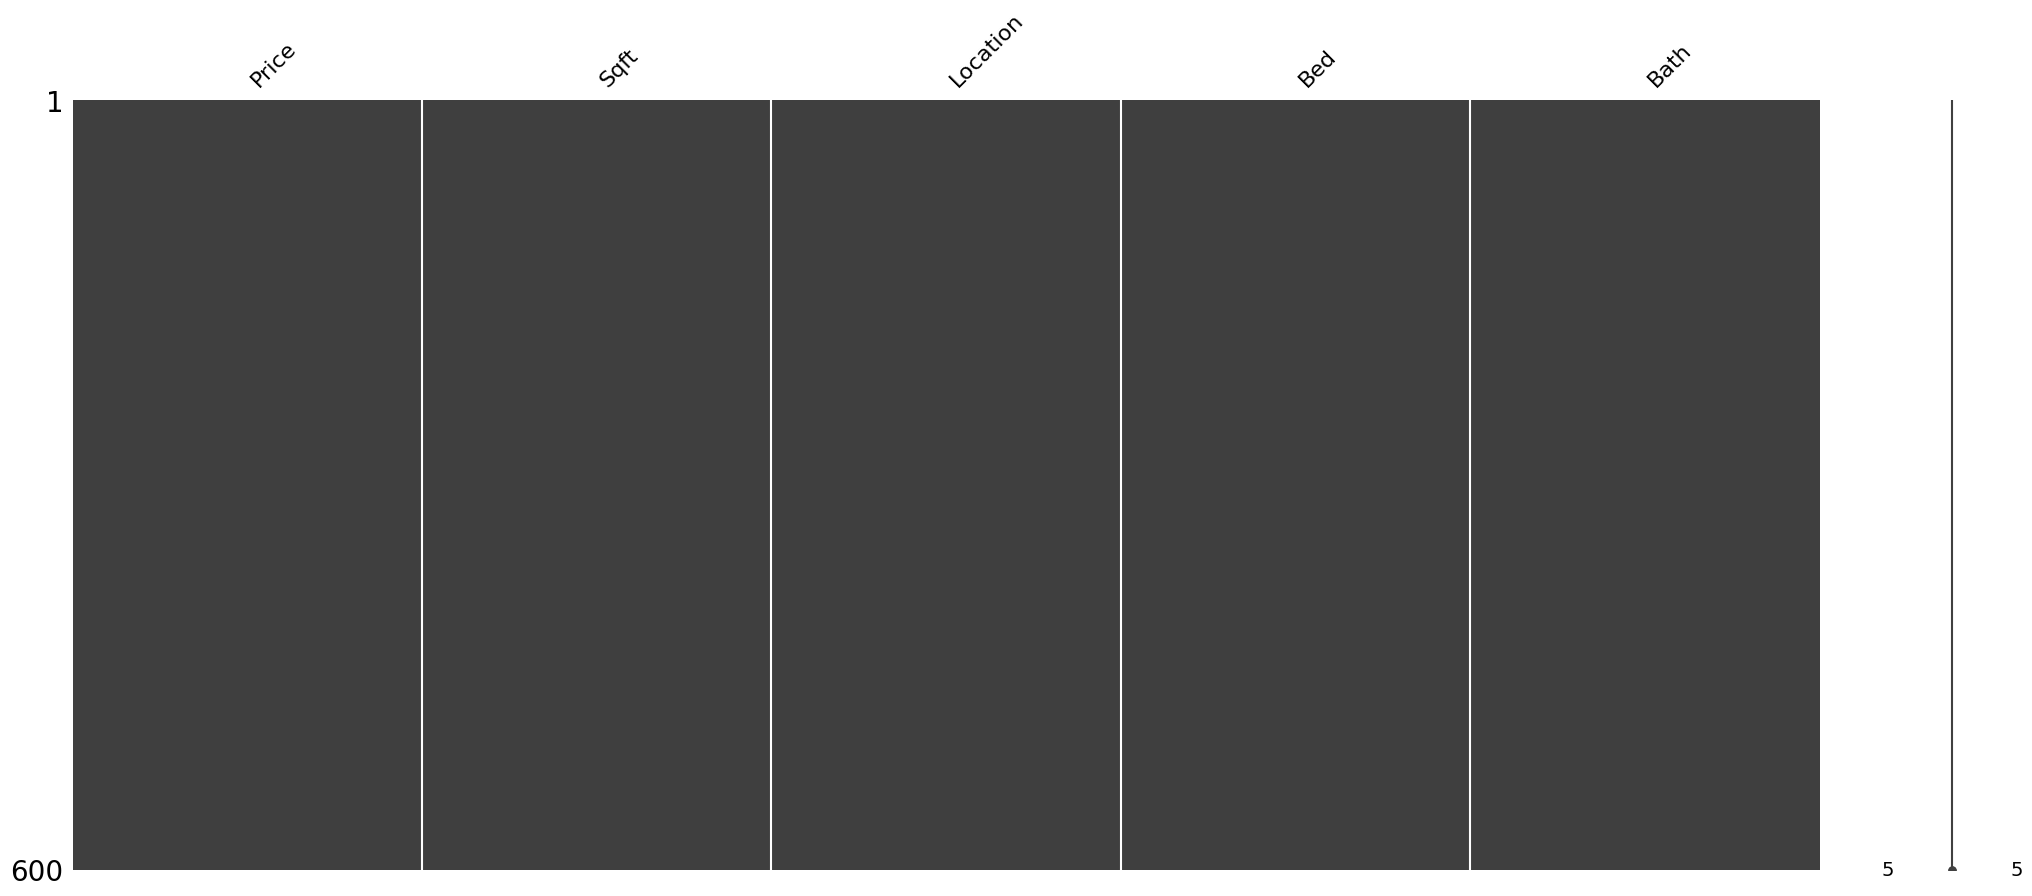

In [ ]:
import missingno as msno

%matplotlib inline
msno.matrix(df_sorted.sample(600))

In [ ]:
null_scraped=df_scraped[df_scraped["Sqft"]=="--"]
null_scraped

,Price,Sqft,Location,Bed,Bath
2,"$540,000",--,queens-new-york-ny,2,2
5,"$250,000",--,queens-new-york-ny,5,2
7,"$829,999",--,queens-new-york-ny,5,3
8,"$439,888",--,queens-new-york-ny,3,2
12,"$989,000",--,queens-new-york-ny,4,2
...,...,...,...,...,...
550,"$205,000",--,staten-island-new-york-ny,4,1
562,"$489,000",--,staten-island-new-york-ny,6,4
595,"$410,000",--,staten-island-new-york-ny,2,1
602,"$519,000",--,staten-island-new-york-ny,2,3
